# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [85]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode
import seaborn as sns
import random

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [86]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
df['title_length'] = df['title'].str.len()

df.head

<bound method NDFrame.head of      star_rating                                            title  \
0            9.3                         The Shawshank Redemption   
1            9.2                                    The Godfather   
2            9.1                           The Godfather: Part II   
3            9.0                                  The Dark Knight   
4            8.9                                     Pulp Fiction   
..           ...                                              ...   
974          7.4                                          Tootsie   
975          7.4                      Back to the Future Part III   
976          7.4  Master and Commander: The Far Side of the World   
977          7.4                                      Poltergeist   
978          7.4                                      Wall Street   

    content_rating      genre  duration  \
0                R      Crime       142   
1                R      Crime       175   
2           

In [87]:
# Calcula media, mediana y moda de la columna 'title_length'
media=df['title_length'].mean()
mediana=df['title_length'].median()
moda=float(df['title_length'].mode())

print('La media', round(media, 2), ', mediana', mediana, 'y moda', float(moda))

La media 15.48 , mediana 14.0 y moda 12.0


/tmp/ipykernel_1007/2734817053.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  moda=float(df['title_length'].mode())


In [88]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'
rango = max(df['title_length']) - min(df['title_length'])
varianza=round(df['title_length'].var(ddof=0), 2)
desviacion_st=round(np.std(df['title_length']), 2)

print('Rango', rango, ', varianza', varianza, 'y desviación estandar', desviacion_st)

Rango 67 , varianza 72.03 y desviación estandar 8.49


In [89]:
# Calcula asimetría y curtosis de la columna 'title_length'
asimetria = skew(df['title_length'])
curtosis = kurtosis(df['title_length'])

print('Asimetria', round(asimetria, 2), 'y curtosis', round(curtosis, 2))

Asimetria 1.52 y curtosis 3.79


In [90]:
# Imprime el título más corto y el título más largo según su longitud
mas_corto=df.loc[df['title_length'].idxmin(),'title']
mas_largo=df.loc[df['title_length'].idxmax(),'title']

print('El mas corto es:', mas_corto, 'y el mas largo:', mas_largo)

El mas corto es: M y el mas largo: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb


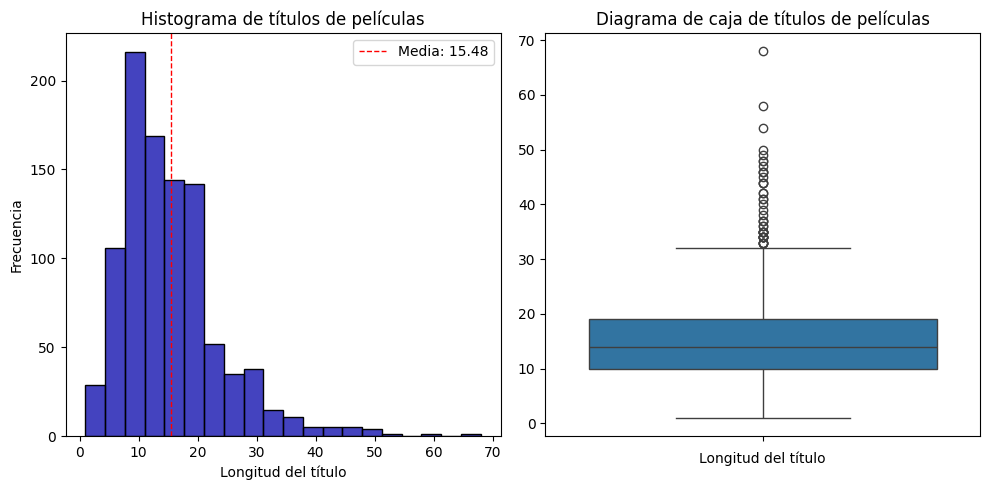

In [91]:
# grafica tus resultados
import seaborn as sns

# Crear la figura y los subplots (una fila y dos columnas)
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5)) 

sns.histplot(df['title_length'], bins=20, color='#0504aa', ax=ax0)
ax0.axvline(media, color='red', linestyle='--', linewidth=1, label=f'Media: {media:.2f}')
ax0.set_title('Histograma de títulos de películas')
ax0.set_xlabel('Longitud del título')
ax0.set_ylabel('Frecuencia')
ax0.legend()

sns.boxplot(df['title_length'], ax=ax1)
ax1.set_title('Diagrama de caja de títulos de películas')
ax1.set_xlabel('Longitud del título')
ax1.set_ylabel('')

plt.tight_layout()

plt.show()


---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [92]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]
numeros = [random.randint(0, 948) for _ in range(5)]
nuevos_datos= df.loc[numeros, 'title_length'].tolist()
print('los datos de la muestra son:', nuevos_datos)

los datos de la muestra son: [15, 6, 13, 21, 10]


In [93]:
# Calcula la media de los 5 valores
media_n=sum(nuevos_datos) / len(nuevos_datos)
print('La media es:', media_n)

La media es: 13.0


In [94]:
# Calcula las diferencias al cuadrado con respecto a la media
suma_cuadrados = 0
for x in nuevos_datos:
    suma_cuadrados += (x - media_n) ** 2

varianza_n=suma_cuadrados/ (len(nuevos_datos) - 1)
#varianza_t=np.var(nuevos_datos, ddof=1)

print('La varianza es:', varianza_n)

La varianza es: 31.5


In [95]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación

desviacion_n = np.sqrt(varianza_n)
print('La desviancion es:', round(desviacion_n, 3))

La desviancion es: 5.612
